# PHASE 2- LOAN PROJECT

Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases

2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions

3.	Married - This refers to applicant being in a state of matrimony

4.	Dependents - This refres to persons who depends on the applicants for survival

5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university

6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer

7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.

8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.

9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.

10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant

11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.

12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.

13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

We have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 
So, this is a BINARY CLASSIFICATION PROBLEM.

-Steps followed in the project-

We need to apply feature engineering/ EDA on the dataset. After that you can split the dataset into train_model and test_model; use this train_model to train our model and test_model to validate our model.

After splitting the dataset we need to train at least 4-5 models.

Check performance of each model

For classification problem- create classification models and check confusion matrix, classification report, accuracy and plot AUC_ROC.

Check the cross validation score for each model(for classification as well as for regression model).

Choose the model as the best model.

For classification problem- model with least difference between performance parameters and cross validation computed on same performance parameter is the best model. Example- Difference between accuracy and cross validation computed on accuracy scoring parameter.

Perform hyper parameter tuning on the best model and check performance of the best model.

Save the best model.

-Steps in EDA and Preprocessing:

Identification of variables and data types

Analyzing the basic metrics

Non-Graphical Univariate Analysis

Missing value treatment

Graphical Univariate Analysis

Bivariate Analysis

Encoding the categorical Data

Outlier treatment

Variable transformations

Correlation Analysis

Dimensionality Reduction

Use of Resampling Techniques to handle Imbalanced Data (For classification problem only)

Scaling of Independent features

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('loan1.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df=df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We see there are no nan values in the dataset.

In [8]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

EDA-

UNIVARIATE ANALYSIS-

Male      502
Female    112
Name: Gender, dtype: int64


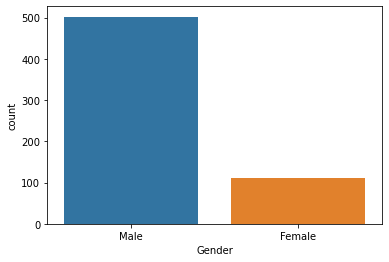

In [9]:
import seaborn as sns
sns.countplot(x='Gender',data=df)
print(df['Gender'].value_counts())

Yes    401
No     213
Name: Married, dtype: int64


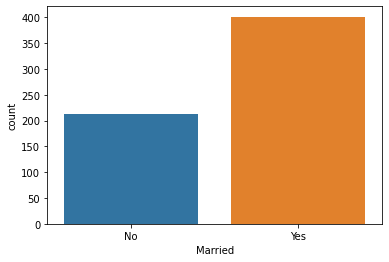

In [10]:
sns.countplot(x='Married',data=df)
print(df['Married'].value_counts())

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


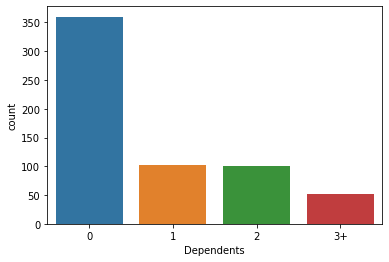

In [11]:
sns.countplot(x='Dependents',data=df)
print(df['Dependents'].value_counts())

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


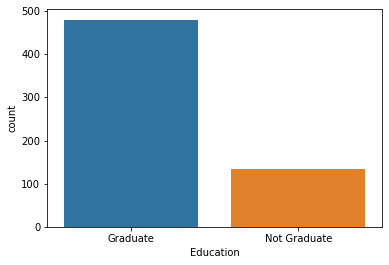

In [12]:
sns.countplot(x='Education',data=df)
print(df['Education'].value_counts())

No     532
Yes     82
Name: Self_Employed, dtype: int64


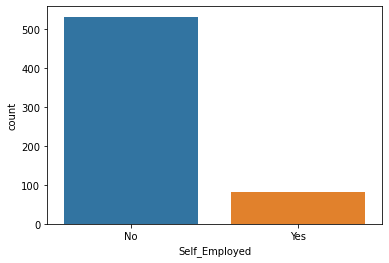

In [13]:
sns.countplot(x='Self_Employed',data=df)
print(df['Self_Employed'].value_counts())

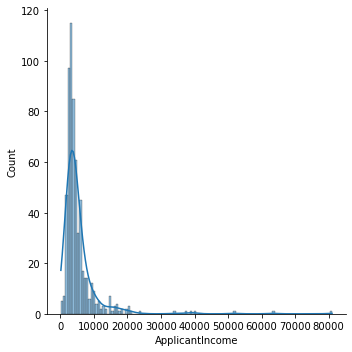

In [14]:
sns.displot(df['ApplicantIncome'],kde=True)

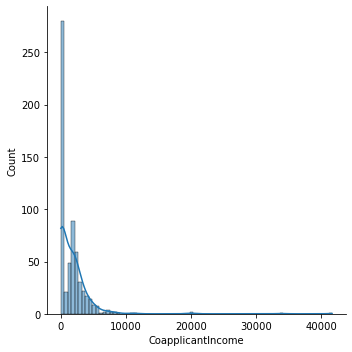

In [15]:
sns.displot(df['CoapplicantIncome'],kde=True)

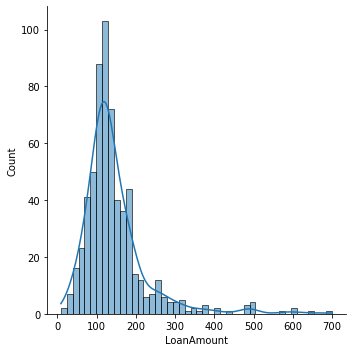

In [16]:
sns.displot(df['LoanAmount'],kde=True)

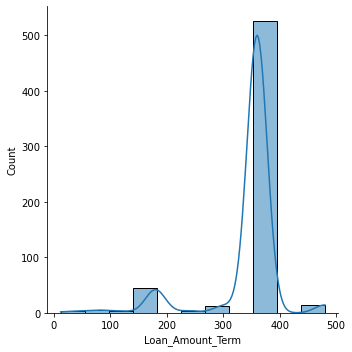

In [17]:
sns.displot(df['Loan_Amount_Term'],kde=True)

1.0    525
0.0     89
Name: Credit_History, dtype: int64


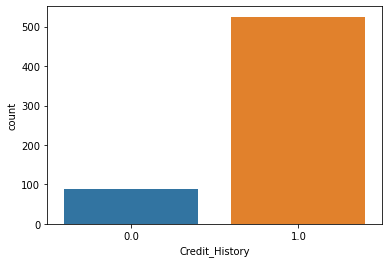

In [19]:
sns.countplot(x='Credit_History',data=df)
print(df['Credit_History'].value_counts())

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


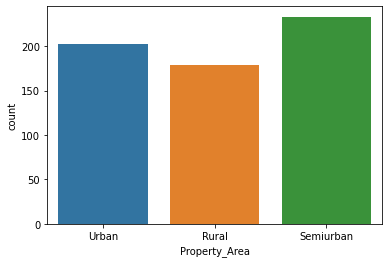

In [20]:
sns.countplot(x='Property_Area',data=df)
print(df['Property_Area'].value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64


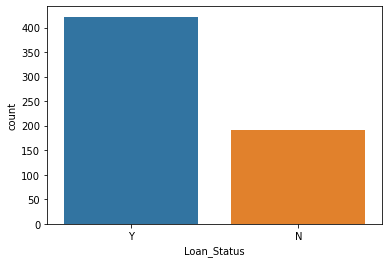

In [21]:
sns.countplot(x='Loan_Status',data=df)
print(df['Loan_Status'].value_counts())

BIVARIATE ANALYSIS-

<AxesSubplot:xlabel='Gender', ylabel='Dependents'>

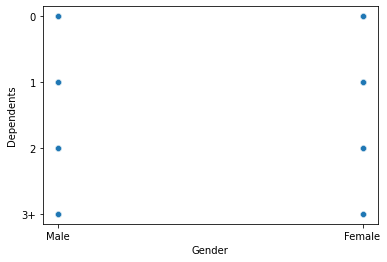

In [22]:
sns.scatterplot(x='Gender',y='Dependents',data=df)

<AxesSubplot:xlabel='Gender', ylabel='Self_Employed'>

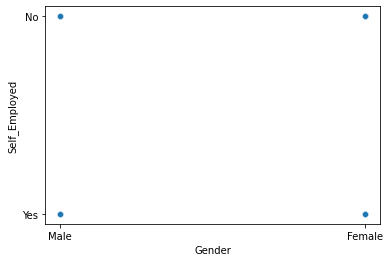

In [23]:
sns.scatterplot(x='Gender',y='Self_Employed',data=df)

<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

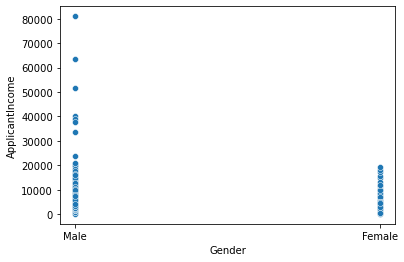

In [24]:
sns.scatterplot(x='Gender',y='ApplicantIncome',data=df)

<AxesSubplot:xlabel='Credit_History', ylabel='Loan_Status'>

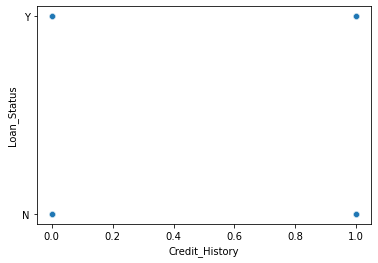

In [25]:
sns.scatterplot(x='Credit_History',y='Loan_Status',data=df)

<AxesSubplot:xlabel='Property_Area', ylabel='Loan_Status'>

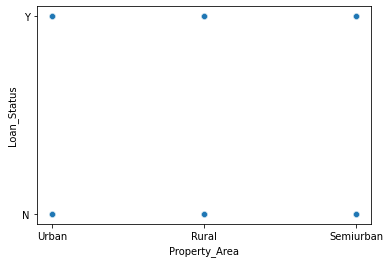

In [26]:
sns.scatterplot(x='Property_Area',y='Loan_Status',data=df)

MULTIVARIATE ANALYSIS-

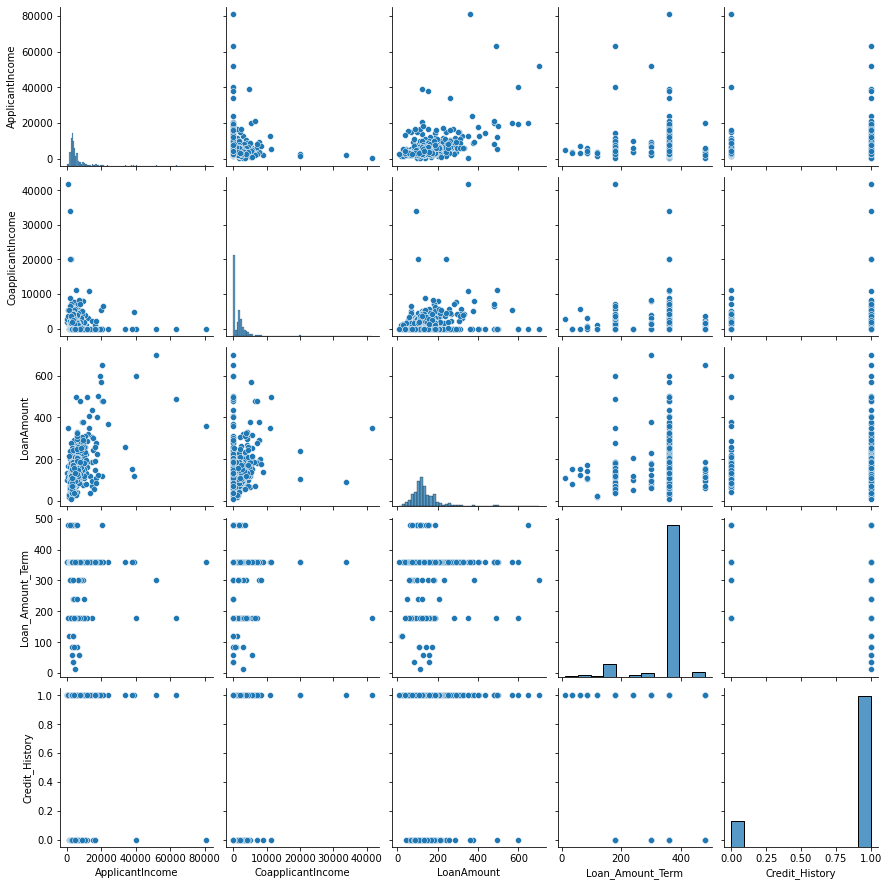

In [27]:
sns.pairplot(data=df)

After EDA we conclude that most of the loans are getting approved which is a good sign for the economy and people, as there is less credit risk and more utilization of financial resources. However, income displayed of men and women is a disappointing factor as even after continuous effotrs, women are not being paid equal to men.

Encoding the dataset-

In [28]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [29]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [30]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,120.0,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1.0
610,610.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1.0
611,611.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1.0
612,612.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1.0


In [31]:
df=df.drop(['Loan_ID'],axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,120.0,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1.0


We drop Loan_ID columns as it is unique to each row and can cause ambiguity and errors.

Correlation-

In [32]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106404,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146212,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163017,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.169436,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.114971,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189723,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.106404,0.146212,0.163017,-0.169436,0.114971,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.047414,-0.031808
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000250,-0.004705,1.000000,0.001963,0.540556


Correlation using heatmap-

<AxesSubplot:>

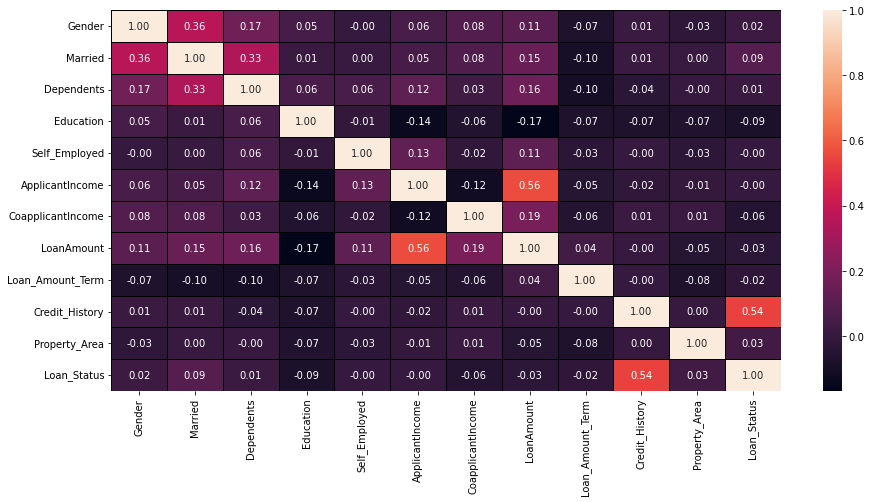

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')

Outcome of Correlation- We see that some data is positively correlated with the target data- Loan_Status, while some are negatively correlated to it.

Describing Datasets-

In [34]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,145.465798,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.180967,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


THE MEAN IS LESS THAN THE MEDIAN SO THE DATA IS LEFT SKEWED.

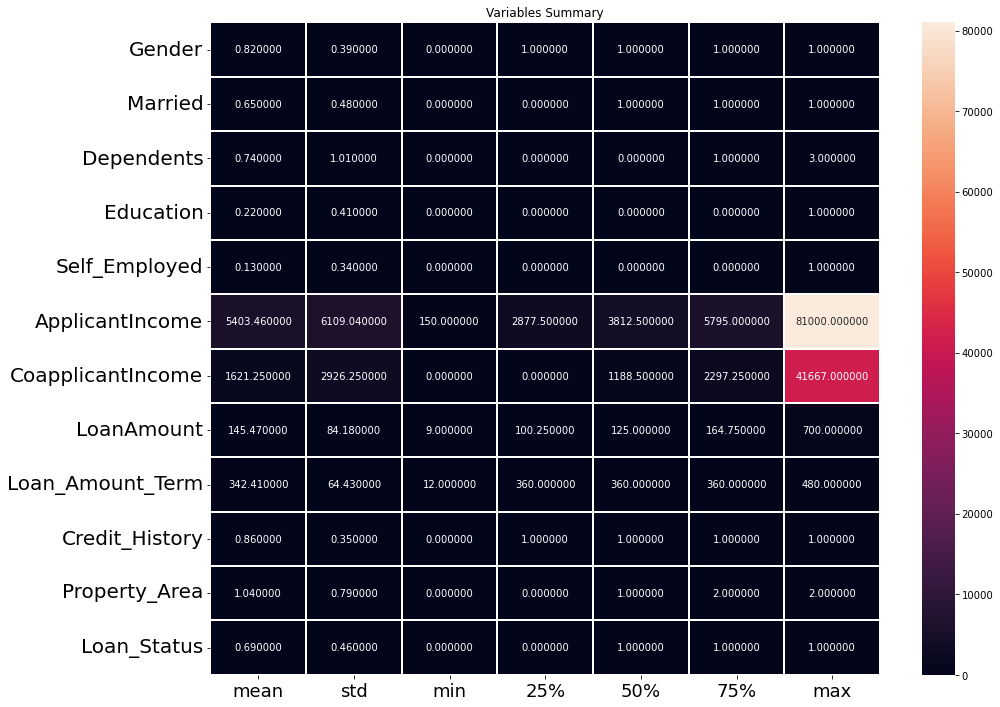

In [35]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=20)
plt.title('Variables Summary')
plt.show()

In [36]:
df.shape

(614, 12)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    float64
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    float64
 11  Loan_Status        614 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 57.7 KB


From the above code we can have the columns datatype and the memory used by the dataframe.

In [38]:
df['Loan_Status'].unique()

array([1., 0.])

Outliers checking-

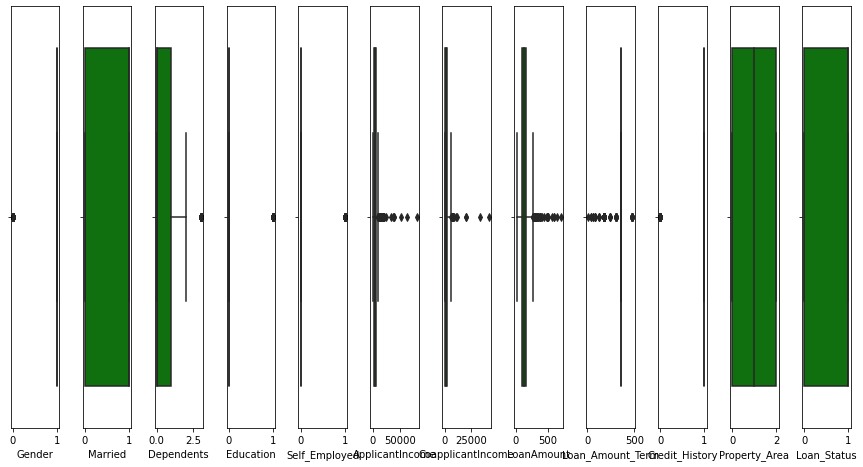

In [39]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

Skewness-

In [40]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.745407
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

Outcome of skewness: Skewness threshold is taken as +/-3.0.

Columns which are having skewness: ApplicantIncome, CoapplicantIncome

Normal Distribution Curve-

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

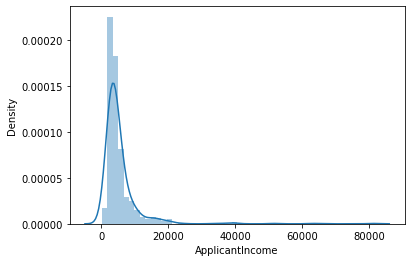

In [41]:
sns.distplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

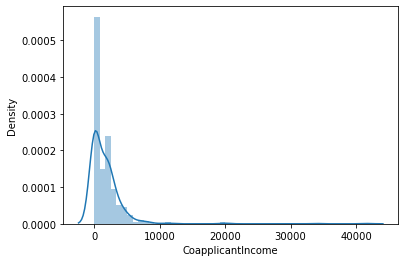

In [42]:
sns.distplot(df['CoapplicantIncome'])

The data of the column is not normalised. The building blocks is out of the normalised curve.

The normal distribution shows that the data is skewed.

Data Cleaning-

In [43]:
delete=pd.DataFrame([['7.491531','CoapplicantIncome','No','Alot']],columns=['Correlation with Target','Column Name','Normalised','Outliers'])
delete

,Correlation with Target,Column Name,Normalised,Outliers
0,7.491531,CoapplicantIncome,No,Alot


In [44]:
df=df.drop(['CoapplicantIncome'],axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,120.0,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,141.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,71.0,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106,40.0,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072,253.0,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583,187.0,360.0,1.0,2.0,1.0


We are only dropping Co applicant income and not applicant income because the later is a major criteria to predict whether the loan will be approved or not.

In [45]:
df.shape

(614, 11)

Removing outliers-

Z-score Technique:

In [46]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

x is independent variable and y is target variable.

In [48]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 183, 185,
        242, 262, 278, 308, 313, 333, 333, 369, 409, 432, 443, 487, 495,
        497, 506, 523, 525, 546, 561, 575, 585, 604]),
 array([7, 7, 7, 5, 6, 7, 5, 6, 5, 6, 6, 5, 5, 7, 7, 6, 6, 7, 5, 6, 6, 5,
        6, 5, 6, 7, 7, 6, 6, 6, 7, 6, 7, 7, 6]))

In [49]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,120.0,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,141.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,71.0,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106,40.0,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072,253.0,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583,187.0,360.0,1.0,2.0,1.0


Percentage of data loss-

In [50]:
data_loss=((612-582)/614)*100
data_loss

4.88599348534202

Oversampling the data-

In [51]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y=SM.fit_resample(x,y)

In [52]:
y.value_counts()

1.0    422
0.0    422
Name: Loan_Status, dtype: int64

CLASSIFICATION MODEL-

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score

Splitting the dataframe-

In [54]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,i)==round(accuracy_score(y_test,pred_test)*100,i):
        print('At random state',i,'The model performs very well')
        print('At random state: ',i)
        print('Training accuracy is:',accuracy_score(y_train,pred_train)*100)
        print('Testing accuracy is:',accuracy_score(y_test,pred_test)*100)

At random state 1 The model performs very well
At random state:  1
Training accuracy is: 75.70370370370371
Testing accuracy is: 75.7396449704142
At random state 307 The model performs very well
At random state:  307
Training accuracy is: 77.62962962962962
Testing accuracy is: 72.18934911242604
At random state 308 The model performs very well
At random state:  308
Training accuracy is: 76.88888888888889
Testing accuracy is: 75.14792899408283


In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=308)

We take random state as 308 because the difference between training and testing accuracy is the least there.

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

         0.0       0.48      0.27      0.34        86
         1.0       0.48      0.70      0.57        83

    accuracy                           0.48       169
   macro avg       0.48      0.48      0.46       169
weighted avg       0.48      0.48      0.45       169



Cross validation score-

In [57]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print('At cv:',j)
    print('Cross validation score is',lsc*100)
    print('Accuracy score is',lss*100)
    print('\n')

At cv: 2
Cross validation score is 72.63033175355451
Accuracy score is 75.14792899408283


At cv: 3
Cross validation score is 74.05500450098012
Accuracy score is 75.14792899408283


At cv: 4
Cross validation score is 74.0521327014218
Accuracy score is 75.14792899408283


At cv: 5
Cross validation score is 75.35291631445477
Accuracy score is 75.14792899408283


At cv: 6
Cross validation score is 75.11229314420804
Accuracy score is 75.14792899408283


At cv: 7
Cross validation score is 75.11707988980716
Accuracy score is 75.14792899408283


At cv: 8
Cross validation score is 75.00673854447439
Accuracy score is 75.14792899408283


At cv: 9
Cross validation score is 75.47217773710568
Accuracy score is 75.14792899408283




In [58]:
lsscore_selected=cross_val_score(lr,x,y,cv=8).mean()
print('The cv score is',lsscore_selected,'\n The accuracy score is',lss)

The cv score is 0.7500673854447439 
 The accuracy score is 0.7514792899408284


In [59]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8757396449704142
[[67 19]
 [ 2 81]]
              precision    recall  f1-score   support

         0.0       0.97      0.78      0.86        86
         1.0       0.81      0.98      0.89        83

    accuracy                           0.88       169
   macro avg       0.89      0.88      0.87       169
weighted avg       0.89      0.88      0.87       169



In [60]:
score=cross_val_score(RFC,x,y,cv=8)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is: ',accuracy_score(y_test,predRFC)-score.mean())

[0.74528302 0.6509434  0.74528302 0.81132075 0.96190476 0.91428571
 0.94285714 0.97142857]
0.8429132973944294
Difference between Accuracy score and cross validation score is:  0.03282634757598479


In [61]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.46153846153846156
[[74 12]
 [79  4]]
              precision    recall  f1-score   support

         0.0       0.48      0.86      0.62        86
         1.0       0.25      0.05      0.08        83

    accuracy                           0.46       169
   macro avg       0.37      0.45      0.35       169
weighted avg       0.37      0.46      0.35       169



Checking cv score for Support vector machine classifier-

In [62]:
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is: ',accuracy_score(y_test,predsvc)-score.mean())

[0.46745562 0.46745562 0.4852071  0.46745562 0.48214286]
0.4739433643279797
Difference between Accuracy score and cross validation score is:  -0.012404902789518113


Checking accuracy score for Gradient Boosting Classifier-

In [63]:
GB= GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8402366863905325
[[64 22]
 [ 5 78]]
              precision    recall  f1-score   support

         0.0       0.93      0.74      0.83        86
         1.0       0.78      0.94      0.85        83

    accuracy                           0.84       169
   macro avg       0.85      0.84      0.84       169
weighted avg       0.86      0.84      0.84       169



Checking cv score for Gradient Boosting Classifier-

In [64]:
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is: ',accuracy_score(y_test,predGB)-score.mean())

[0.70414201 0.68639053 0.89349112 0.90532544 0.92857143]
0.8235841081994929
Difference between Accuracy score and cross validation score is:  0.016652578191039602


Checking accuracy score using KNN-

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
pr=knn.predict(x_test)
print(pr)
print('Accuracy score is:', accuracy_score(y_test,pr))
print(confusion_matrix(y_test,pr))
print(classification_report(y_test,pr))

[0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1.
 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 1.]
Accuracy score is: 0.6094674556213018
[[54 32]
 [34 49]]
              precision    recall  f1-score   support

         0.0       0.61      0.63      0.62        86
         1.0       0.60      0.59      0.60        83

    accuracy                           0.61       169
   macro avg       0.61      0.61      0.61       169
weighted avg       0.61      0.61      0.61       169



Checking cv score for KNN-

In [66]:
score=cross_val_score(knn,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is: ',accuracy_score(y_test,pr)-score.mean())

[0.6035503  0.5443787  0.62721893 0.61538462 0.625     ]
0.6031065088757397
Difference between Accuracy score and cross validation score is:  0.0063609467455620905


We see that RFC is the best model here because it has the least difference between Accuracy score and Cross Validation Score.

Hyper parameter tuning-

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
param_grid={'n_estimators': [200,500],
           'max_features': ['auto','sqrt','log2'],
           'max_depth': [4,5,6,7,8],
           'criterion': ['gini','entropy']}

In [69]:
grid=GridSearchCV(RFC,param_grid,cv=8)

In [70]:
grid.fit(x_train,y_train)

GridSearchCV(cv=8, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [71]:
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 200}


In [72]:
print(grid.best_estimator_)

RandomForestClassifier(max_depth=7, max_features='auto', n_estimators=200)


In [73]:
grid_predictions=grid.predict(x_test)
grid_predictions

array([1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.])

In [74]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         0.0       1.00      0.73      0.85        86
         1.0       0.78      1.00      0.88        83

    accuracy                           0.86       169
   macro avg       0.89      0.87      0.86       169
weighted avg       0.89      0.86      0.86       169



Accuracy score is 86% which means our model is performing very good.

AUC ROC CURVE-

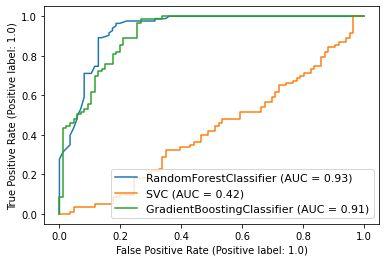

In [75]:
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve
disp=plot_roc_curve(RFC,x_test,y_test)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(GB,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

Model Saving-

In [76]:
import pickle
filename='loan1.pk1'
pickle.dump(lr,open(filename,'wb'))

Conclusion-

In [77]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))
df_com

,original,predicted
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,0.0,0.0
4,1.0,1.0
...,...,...
164,1.0,1.0
165,0.0,1.0
166,0.0,1.0
167,0.0,0.0


We can visualize that there is minimal error in the outcome using the above model.

THE END